In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 

import numpy as np
import pandas as pd

from sklearn.datasets import make_classification 
#from sklearn.cross_validation import train_test_split 
#from sklearn.grid_search import GridSearchCV
#from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import learning_curve, ShuffleSplit,train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
from keras.utils import to_categorical

import seaborn 
seaborn.set_context('notebook') 
seaborn.set_style(style='darkgrid')

from pprint import pprint 

C:\Users\lskel\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
file = 'german.data'
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']

data = pd.read_csv(file,names = names, delimiter=' ')
print(data.shape)
print (data.columns)
data.head(10)

(1000, 21)
Index(['existingchecking', 'duration', 'credithistory', 'purpose',
       'creditamount', 'savings', 'employmentsince', 'installmentrate',
       'statussex', 'otherdebtors', 'residencesince', 'property', 'age',
       'otherinstallmentplans', 'housing', 'existingcredits', 'job',
       'peopleliable', 'telephone', 'foreignworker', 'classification'],
      dtype='object')


,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


In [3]:
# Binarize the y output for easier use of e.g. ROC curves -> 0 = 'normal' credit; 1 = 'abnormal' credit
data.classification.replace([1,2], [1,0], inplace=True)
data.classification.value_counts()
#number of normal credits should be 700 abnormal should be 300

1    700
0    300
Name: classification, dtype: int64

#### There are 700 data classified as non fradulent and  300 classified as fradulent

In [4]:
data

,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,0


### Data Preprocessing to convert all catergorical data to int and all numerical data to float

In [5]:
from sklearn import linear_model
from copy import deepcopy

numvars = ['duration', 'creditamount', 'installmentrate', 'residencesince', 'age', 
           'existingcredits', 'peopleliable']

df = deepcopy(data)
encoder = LabelEncoder()

for n in names:
    if n not in numvars:
        df[n] = encoder.fit_transform(df[n])
    else:
        df[n] = df[n].astype(float)
        
df

,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,0,6.0,4,4,1169.0,4,4,4.0,2,0,...,0,67.0,2,1,2.0,2,1.0,1,0,1
1,1,48.0,2,4,5951.0,0,2,2.0,1,0,...,0,22.0,2,1,1.0,2,1.0,0,0,0
2,3,12.0,4,7,2096.0,0,3,2.0,2,0,...,0,49.0,2,1,1.0,1,2.0,0,0,1
3,0,42.0,2,3,7882.0,0,3,2.0,2,2,...,1,45.0,2,2,1.0,2,2.0,0,0,1
4,0,24.0,3,0,4870.0,0,2,3.0,2,0,...,3,53.0,2,2,2.0,2,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12.0,2,3,1736.0,0,3,3.0,1,0,...,0,31.0,2,1,1.0,1,1.0,0,0,1
996,0,30.0,2,1,3857.0,0,2,4.0,0,0,...,1,40.0,2,1,1.0,3,1.0,1,0,1
997,3,12.0,2,4,804.0,0,4,4.0,2,0,...,2,38.0,2,1,1.0,2,1.0,0,0,1
998,0,45.0,2,4,1845.0,0,2,4.0,2,0,...,3,23.0,2,2,1.0,2,1.0,1,0,0


In [6]:
X = df.drop(['classification'], axis=1)
y = df['classification'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40124)

In [7]:
X_train

,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,residencesince,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker
299,1,21.0,4,3,2745.0,3,3,3.0,2,0,2.0,2,32.0,2,1,2.0,2,1.0,1,0
37,2,18.0,2,4,2100.0,0,2,4.0,2,1,2.0,0,37.0,1,1,1.0,2,1.0,0,0
284,1,24.0,4,0,3878.0,1,1,4.0,0,0,2.0,2,37.0,2,1,1.0,2,1.0,1,0
176,0,12.0,2,3,2577.0,0,2,2.0,0,0,1.0,2,42.0,2,1,1.0,2,1.0,0,0
311,3,24.0,2,3,5511.0,1,2,4.0,2,0,1.0,2,25.0,1,1,1.0,2,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,1,15.0,2,6,1308.0,0,4,4.0,2,0,4.0,2,38.0,2,1,2.0,1,1.0,0,0
32,1,18.0,2,0,5866.0,1,2,2.0,2,0,2.0,2,30.0,2,1,2.0,2,1.0,1,0
161,3,18.0,4,0,1055.0,0,1,4.0,1,0,1.0,1,30.0,2,1,2.0,2,1.0,0,0
256,3,24.0,4,4,2684.0,0,2,4.0,2,0,2.0,0,35.0,2,1,2.0,1,1.0,0,0


In [8]:
y_train

299    1
37     0
284    1
176    1
311    1
      ..
641    1
32     1
161    1
256    1
249    0
Name: classification, Length: 750, dtype: int64

### Logistic Regression Model with all variables

In [9]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, matthews_corrcoef

log_reg = linear_model.LogisticRegression(solver = 'lbfgs',max_iter=500)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()


cm_table = pd.DataFrame({'Actual Condition +ve': [TP,FN], 
                         'Actual Condition -ve': [FP,TN]})
cm = cm_table.rename(index={0:'Predicted Condition +ve', 
                            1:'Predicted Condition -ve'})

print("Logistic Regression Confusion Matrix: \n", cm)
print("True negative: %s, False positive: %s, False negative: %s, True positive: %s" %(TN, FP, FN, TP))

print("\n")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("MCC: ", matthews_corrcoef(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))

Logistic Regression Confusion Matrix: 
                          Actual Condition +ve  Actual Condition -ve
Predicted Condition +ve                   159                    34
Predicted Condition -ve                    23                    34
True negative: 34, False positive: 34, False negative: 23, True positive: 159


Accuracy:  0.772
Recall:  0.8736263736263736
Precision:  0.8238341968911918
MCC:  0.39628861234115725
F1:  0.8480000000000001
ROC AUC:  0.6868131868131868


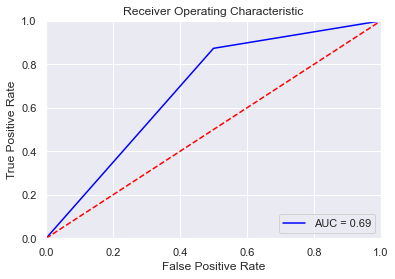

In [10]:
import sklearn.metrics as metrics
fp, tp, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fp, tp)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fp, tp, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Logistic Regression Model re-train again with most significanct variables

In [11]:
X_train_log_opt = deepcopy(X_train[['existingchecking', 'duration', 'savings', 
                                    'employmentsince', 'otherinstallmentplans']])

X_test_log_opt = deepcopy(X_test[['existingchecking', 'duration', 'savings', 
                                  'employmentsince', 'otherinstallmentplans']])

In [12]:
log_reg_opt = linear_model.LogisticRegression(solver = 'lbfgs',class_weight="balanced",max_iter=500)
log_reg_opt.fit(X_train_log_opt, y_train)
THRESHOLD = 0.18
y_pred = np.where(log_reg_opt.predict_proba(X_test_log_opt)[:,1] > THRESHOLD, 1, 0)
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

cm_table = pd.DataFrame({'Actual Condition +ve': [TP,FN], 
                         'Actual Condition -ve': [FP,TN]})
cm = cm_table.rename(index={0:'Predicted Condition +ve', 
                            1:'Predicted Condition -ve'})

print("Logistic Regression(Significant Variables) Confusion Matrix: \n", cm)
print("True negative: %s, False positive: %s, False negative: %s, True positive: %s" %(TN, FP, FN, TP))

print("\n")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("MCC: ", matthews_corrcoef(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))

Logistic Regression(Significant Variables) Confusion Matrix: 
                          Actual Condition +ve  Actual Condition -ve
Predicted Condition +ve                   180                    61
Predicted Condition -ve                     2                     7
True negative: 7, False positive: 61, False negative: 2, True positive: 180


Accuracy:  0.748
Recall:  0.989010989010989
Precision:  0.7468879668049793
MCC:  0.219645512971216
F1:  0.851063829787234
ROC AUC:  0.5459760827407887


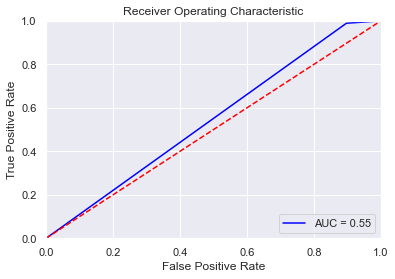

In [13]:
fp, tp, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fp, tp)

plt.title('Receiver Operating Characteristic')
plt.plot(fp, tp, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree Model with all variables

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 4012)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()


cm_table = pd.DataFrame({'Actual Condition +ve': [TP,FN], 
                         'Actual Condition -ve': [FP,TN]})
cm = cm_table.rename(index={0:'Predicted Condition +ve', 
                            1:'Predicted Condition -ve'})

print("Decision Tree CART Confusion Matrix: \n", cm)
print("True negative: %s, False positive: %s, False negative: %s, True positive: %s" %(TN, FP, FN, TP))

print("\n")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("MCC: ", matthews_corrcoef(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))

Decision Tree CART Confusion Matrix: 
                          Actual Condition +ve  Actual Condition -ve
Predicted Condition +ve                   137                    41
Predicted Condition -ve                    45                    27
True negative: 27, False positive: 41, False negative: 45, True positive: 137


Accuracy:  0.656
Recall:  0.7527472527472527
Precision:  0.7696629213483146
MCC:  0.14721203969074925
F1:  0.7611111111111112
ROC AUC:  0.5749030381383322


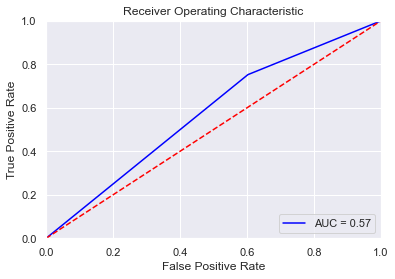

In [15]:
import sklearn.metrics as metrics
fp, tp, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fp, tp)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fp, tp, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree Model with most significant variables

In [16]:
X_train_dt_opt = deepcopy(X_train[['existingchecking', 'duration', 'savings', 'purpose']])

X_test_dt_opt = deepcopy(X_test[['existingchecking', 'duration', 'savings', 'purpose']])

In [17]:
tree = DecisionTreeClassifier(random_state = 4012)
tree.fit(X_train_dt_opt, y_train)
y_pred = tree.predict(X_test_dt_opt)
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()


cm_table = pd.DataFrame({'Actual Condition +ve': [TP,FN], 
                         'Actual Condition -ve': [FP,TN]})
cm = cm_table.rename(index={0:'Predicted Condition +ve', 
                            1:'Predicted Condition -ve'})

print("Decision Tree CART(Significant Variables) Confusion Matrix: \n", cm)
print("True negative: %s, False positive: %s, False negative: %s, True positive: %s" %(TN, FP, FN, TP))

print("\n")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("MCC: ", matthews_corrcoef(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))

Decision Tree CART(Significant Variables) Confusion Matrix: 
                          Actual Condition +ve  Actual Condition -ve
Predicted Condition +ve                   128                    26
Predicted Condition -ve                    54                    42
True negative: 42, False positive: 26, False negative: 54, True positive: 128


Accuracy:  0.68
Recall:  0.7032967032967034
Precision:  0.8311688311688312
MCC:  0.2936453395505713
F1:  0.761904761904762
ROC AUC:  0.6604718810601163


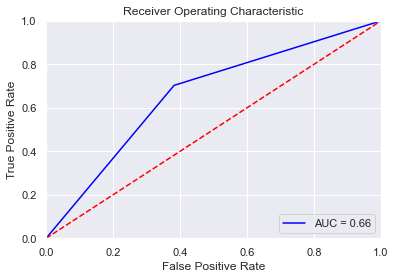

In [18]:
fp, tp, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fp, tp)

plt.title('Receiver Operating Characteristic')
plt.plot(fp, tp, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest Decision Tree Model with most significant variables

In [19]:
from sklearn.ensemble import RandomForestClassifier

X_train_RFC = deepcopy(X_train[['existingchecking','credithistory',
                                'savings','employmentsince','otherinstallmentplans']])
X_test_RFC = deepcopy(X_test[['existingchecking','credithistory',
                                'savings','employmentsince','otherinstallmentplans']])

random_forest = RandomForestClassifier(n_estimators=1000, random_state=1)
random_forest.fit(X_train_RFC, y_train)

THRESHOLD = 0.7

y_pred = np.where(random_forest.predict_proba(X_test_RFC)[:,1] > THRESHOLD, 1, 0)

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

cm_table = pd.DataFrame({'Actual Condition +ve': [TP,FN], 
                         'Actual Condition -ve': [FP,TN]})
cm = cm_table.rename(index={0:'Predicted Condition +ve', 
                            1:'Predicted Condition -ve'})

print("Random Forest(Significant Variables) Confusion Matrix: \n", cm)
print("True negative: %s, False positive: %s, False negative: %s, True positive: %s" %(TN, FP, FN, TP))

print("\n")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("MCC: ", matthews_corrcoef(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))

Random Forest(Significant Variables) Confusion Matrix: 
                          Actual Condition +ve  Actual Condition -ve
Predicted Condition +ve                   105                    16
Predicted Condition -ve                    77                    52
True negative: 52, False positive: 16, False negative: 77, True positive: 105


Accuracy:  0.628
Recall:  0.5769230769230769
Precision:  0.8677685950413223
MCC:  0.30419865393057666
F1:  0.693069306930693
ROC AUC:  0.670814479638009


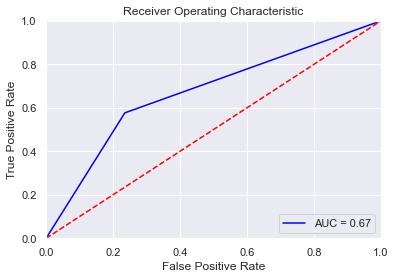

In [20]:
fp, tp, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fp, tp)

plt.title('Receiver Operating Characteristic')
plt.plot(fp, tp, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Xgboost model

In [21]:
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import EditedNearestNeighbours

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   existingchecking       1000 non-null   int32  
 1   duration               1000 non-null   float64
 2   credithistory          1000 non-null   int32  
 3   purpose                1000 non-null   int32  
 4   creditamount           1000 non-null   float64
 5   savings                1000 non-null   int32  
 6   employmentsince        1000 non-null   int32  
 7   installmentrate        1000 non-null   float64
 8   statussex              1000 non-null   int32  
 9   otherdebtors           1000 non-null   int32  
 10  residencesince         1000 non-null   float64
 11  property               1000 non-null   int32  
 12  age                    1000 non-null   float64
 13  otherinstallmentplans  1000 non-null   int32  
 14  housing                1000 non-null   int32  
 15  exist

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 4012)
over = SMOTE(random_state = 4012)
steps = [('o', over)]
pipeline = Pipeline(steps=steps)
X_train, y_train = pipeline.fit_resample(X_train, y_train)

In [24]:
%%time

parameters = {
    'n_estimators':[3000],
    'learning_rate': [0.005],
    'subsample':[0.555],
    'colsample_bytree':[0.7],
    'min_child_weight':[3],
    'max_depth':[8],
    'n_jobs' : [-1],
    'objective':['binary:logistic']
}
eval_set = [(X_train, y_train), (X_test, y_test)]
model = XGBClassifier(random_state=4012)
clf = GridSearchCV(model, parameters,n_jobs=7, scoring='roc_auc')
clf.fit(X_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

Best params: {'colsample_bytree': 0.7, 'learning_rate': 0.005, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 3000, 'n_jobs': -1, 'objective': 'binary:logistic', 'subsample': 0.555}
Best validation score = 0.9089844724733253
Wall time: 7.83 s


In [25]:
%%time

model = XGBClassifier(**clf.best_params_)
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

Wall time: 2.56 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.005, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=3000, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.555,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=4012)
pred_test_full =0
auc_scores = []
all_y_pred = []
all_y_proba = []
all_y_true = []

for train_index,test_index in kf.split(X,y):
    X_train,X_test = X.loc[train_index],X.loc[test_index]
    y_train,y_test = y.loc[train_index],y.loc[test_index]
    over = SMOTE(random_state = 4012)
    steps = [('o', over)]
    pipeline = Pipeline(steps=steps)
    X_train, y_train = pipeline.fit_resample(X_train, y_train)
    #model
    eval_set = [(X_train, y_train), (X_test, y_test)]
    model = XGBClassifier(**clf.best_params_)
    model.fit(X_train, y_train, eval_set=eval_set, verbose=False)
    y_preds = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    all_y_pred.extend(y_preds)
    all_y_proba.extend(y_proba[:,1])
    all_y_true.extend(y_test)

cm = confusion_matrix(all_y_true, all_y_pred)
TN, FP, FN, TP = cm.ravel()

cm_table = pd.DataFrame({'Actual Condition +ve': [TP,FN], 
                         'Actual Condition -ve': [FP,TN]})
cm = cm_table.rename(index={0:'Predicted Condition +ve', 
                            1:'Predicted Condition -ve'})

print("Xgboost Confusion Matrix: \n", cm)
print("True negative: %s, False positive: %s, False negative: %s, True positive: %s" %(TN, FP, FN, TP))

print("\n")
print("Accuracy: ", accuracy_score(all_y_true, all_y_pred))
print("Recall: ", recall_score(all_y_true, all_y_pred))
print("Precision: ", precision_score(all_y_true, all_y_pred))
print("MCC: ", matthews_corrcoef(all_y_true, all_y_pred))
print("F1: ", f1_score(all_y_true, all_y_pred))
print("ROC AUC: ", roc_auc_score(all_y_true, all_y_pred))

Xgboost Confusion Matrix: 
                          Actual Condition +ve  Actual Condition -ve
Predicted Condition +ve                   605                   142
Predicted Condition -ve                    95                   158
True negative: 158, False positive: 142, False negative: 95, True positive: 605


Accuracy:  0.763
Recall:  0.8642857142857143
Precision:  0.8099062918340026
MCC:  0.41210980574683004
F1:  0.8362128541810643
ROC AUC:  0.6954761904761905


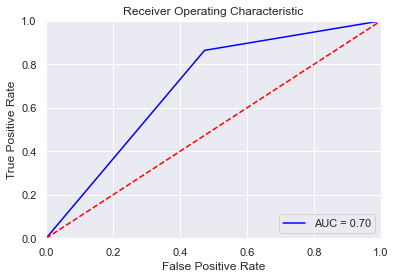

In [27]:
fpr, tpr, threshold = metrics.roc_curve(all_y_true, all_y_pred)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

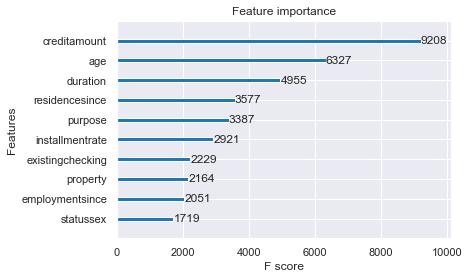

In [28]:
from xgboost import plot_importance
plot_importance(model, max_num_features = 10)

## Now we run with the top 5 features 

In [29]:
X = df[['creditamount','age','duration','residencesince','purpose']].copy()
y = df['classification'].copy()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   creditamount    1000 non-null   float64
 1   age             1000 non-null   float64
 2   duration        1000 non-null   float64
 3   residencesince  1000 non-null   float64
 4   purpose         1000 non-null   int32  
dtypes: float64(4), int32(1)
memory usage: 35.3 KB


In [30]:
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=4012)
pred_test_full =0
auc_scores = []
all_y_pred = []
all_y_proba = []
all_y_true = []

for train_index,test_index in kf.split(X,y):
    X_train,X_test = X.loc[train_index],X.loc[test_index]
    y_train,y_test = y.loc[train_index],y.loc[test_index]
    over = SMOTE(random_state = 4012)
    steps = [('o', over)]
    pipeline = Pipeline(steps=steps)
    X_train, y_train = pipeline.fit_resample(X_train, y_train)
    #model
    eval_set = [(X_train, y_train), (X_test, y_test)]
    model = XGBClassifier(**clf.best_params_)
    model.fit(X_train, y_train, eval_set=eval_set, verbose=False)
    y_preds = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    all_y_pred.extend(y_preds)
    all_y_proba.extend(y_proba[:,1])
    all_y_true.extend(y_test)

cm = confusion_matrix(all_y_true, all_y_pred)
TN, FP, FN, TP = cm.ravel()

cm_table = pd.DataFrame({'Actual Condition +ve': [TP,FN], 
                         'Actual Condition -ve': [FP,TN]})
cm = cm_table.rename(index={0:'Predicted Condition +ve', 
                            1:'Predicted Condition -ve'})

print("Xgboost Confusion Matrix: \n", cm)
print("True negative: %s, False positive: %s, False negative: %s, True positive: %s" %(TN, FP, FN, TP))

print("\n")
print("Accuracy: ", accuracy_score(all_y_true, all_y_pred))
print("Recall: ", recall_score(all_y_true, all_y_pred))
print("Precision: ", precision_score(all_y_true, all_y_pred))
print("MCC: ", matthews_corrcoef(all_y_true, all_y_pred))
print("F1: ", f1_score(all_y_true, all_y_pred))
print("ROC AUC: ", roc_auc_score(all_y_true, all_y_pred))

Xgboost Confusion Matrix: 
                          Actual Condition +ve  Actual Condition -ve
Predicted Condition +ve                   566                   193
Predicted Condition -ve                   134                   107
True negative: 107, False positive: 193, False negative: 134, True positive: 566


Accuracy:  0.673
Recall:  0.8085714285714286
Precision:  0.7457180500658761
MCC:  0.17704775255329044
F1:  0.7758738862234407
ROC AUC:  0.5826190476190477


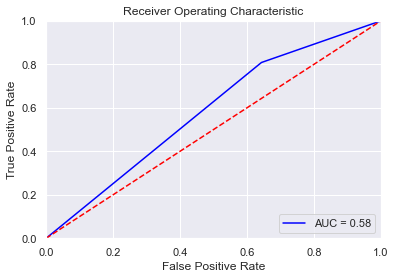

In [31]:
fpr, tpr, threshold = metrics.roc_curve(all_y_true, all_y_pred)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()